In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#plotly imports
# import cufflinks as cf
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)
# cf.go_offline()

In [3]:
df = pd.read_csv('updatedDatasets/Update3.csv',index_col='Respondent')
pd.set_option('display.max_columns',None)
df.tail(3)

,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,YearsCodedJob,DeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ProblemSolving,LearningNewTech,JobSecurity,DiversityImportant,SeriousWork,WorkPayCare,ChallengeMyself,LastNewJob,ImportantBenefits,JobProfile,LearnedHiring,Overpaid,EducationImportant,EducationTypes,WorkStart,HaveWorkedLanguage,WantWorkLanguage,HaveWorkedDatabase,WantWorkDatabase,HaveWorkedPlatform,WantWorkPlatform,IDE,AuditoryEnvironment,Gender,HighestEducationParents,Salary,ExpectedSalary,Assess_Scoring
Respondent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
51390,Professional developer,"Yes, I program as a hobby",Canada,No,Employed full-time,Some college/university study without earning ...,"Information technology, networking, or system ...",Less than a year,Web developer; Systems administrator,NaN,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Glassdoor; LinkedIn,I was contacted directly by someone at the com...,NaN,Not very important,Self-taught; Coding competition,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33298.752045,NaN,NaN
51391,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer science or software engineering,1 to 5 years,Web developer; Mobile developer,NaN,6.0,7.0,Strongly agree,Strongly agree,Somewhat agree,Disagree,Strongly agree,Disagree,Strongly agree,Between 2 and 4 years ago,Equipment; Education sponsorship; Expected wor...,NaN,NaN,Greatly underpaid,NaN,NaN,2:00 PM,JavaScript; PHP; Swift,Clojure; Erlang; Haskell,MySQL,NaN,iOS; WordPress,Android,Emacs; Vim; Xcode,Turn on some music,Male,A bachelor's degree,40000.000000,NaN,22.5
51392,Professional non-developer who sometimes write...,No,Ireland,No,Employed full-time,Bachelor's degree,Computer science or software engineering,5 to 10 years,NaN,Other,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Between 2 and 4 years ago,Annual bonus; Vacation/days off; Health benefi...,LinkedIn,I was contacted directly by someone at the com...,NaN,NaN,Online course; Part-time/evening course; Indus...,8:00 AM,Java; JavaScript; PHP; Python; Ruby; Swift,NaN,MongoDB; Redis; MySQL; PostgreSQL,NaN,NaN,NaN,Notepad++; Eclipse; Visual Studio,Keep the room absolutely quiet,Male,A bachelor's degree,52440.943126,NaN,30.5


In [4]:
data2 = df[['WorkStart','Country']]
data2.head(2)

,WorkStart,Country
Respondent,,
1,6:00 AM,United States
2,10:00 AM,United Kingdom


In [5]:
data2['WorkStart'].value_counts()

9:00 AM     9401
10:00 AM    9091
8:00 AM     7076
7:00 AM     3364
11:00 AM    2212
6:00 AM     1216
Noon        1146
2:00 PM      443
1:00 PM      399
5:00 AM      294
8:00 PM      280
6:00 PM      254
4:00 PM      249
10:00 PM     212
3:00 PM      206
9:00 PM      156
5:00 PM      134
7:00 PM      127
4:00 AM      123
Midnight      90
11:00 PM      85
1:00 AM       53
3:00 AM       50
2:00 AM       35
Name: WorkStart, dtype: int64

In [6]:
morning=['9:00 AM','10:00 AM','8:00 AM','7:00 AM','11:00 AM','6:00 AM']
noon=['1:00 PM','2:00 PM','3:00 PM','4:00 PM','5:00 PM','6:00 PM','Noon']
evening=['7:00 PM','8:00 PM','9:00 PM','10:00 PM']
night=['11:00 PM','1:00 AM','2:00 AM','Midnight']
beforeMorning=['3:00 AM','4:00 AM','5:00 AM']
def workingTime(x):
    if x in morning:
        return 'morning' 
    elif x in noon:
        return 'noon' 
    elif x in evening:
        return 'evening' 
    elif x in night:
        return 'night' 
    elif x in beforeMorning:
        return 'beforeMorning' 
    else:
        return np.nan
    
data2['WorkStart']=data2['WorkStart'].apply(workingTime)
data2['WorkStart'].value_counts()

<ipython-input-6-4b72c3466d22>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['WorkStart']=data2['WorkStart'].apply(workingTime)


morning          32360
noon              2831
evening            775
beforeMorning      467
night              263
Name: WorkStart, dtype: int64

In [7]:
data2.head()

,WorkStart,Country
Respondent,,
1,morning,United States
2,morning,United Kingdom
3,morning,United Kingdom
4,morning,United States
5,NaN,Switzerland


In [8]:
data2['Country'].value_counts()[:7]

United States     11455
India              5197
United Kingdom     4395
Germany            4143
Canada             2233
France             1740
Poland             1290
Name: Country, dtype: int64

In [9]:
L=['United States','India','United Kingdom','Germany','Canada','France','Poland']
data2['Country']=data2['Country'].apply(lambda x: x if x in L else 'Other')
data2.head()

<ipython-input-9-8fe8bc630d5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['Country']=data2['Country'].apply(lambda x: x if x in L else 'Other')


,WorkStart,Country
Respondent,,
1,morning,United States
2,morning,United Kingdom
3,morning,United Kingdom
4,morning,United States
5,NaN,Other


In [10]:
df3 = data2.groupby(by=['Country','WorkStart']).size()
df3=df3.to_frame()
df3

0
Country        WorkStart           
Canada         beforeMorning     21
               evening           15
               morning         1587
               night              8
               noon              78
France         beforeMorning      9
               evening           20
               morning         1115
               night              6
               noon              69
Germany        beforeMorning     26
               evening           46
               morning         2797
               night              9
               noon             210
India          beforeMorning     65
               evening          141
               morning         2188
               night             58
               noon             372
Other          beforeMorning    181
               evening          385
               morning        12309
               night            157
               noon            1403
Poland         beforeMorning      6
               evening           20
               morning          872
               night              3
               noon              61
United Kingdom beforeMorning     24
               evening           42
               morning         3193
               night              6
               noon             162
United States  beforeMorning    135
               evening          106
               morning         8299
               night             16
               noon             476

In [11]:
df3 = df3.reset_index()
df3.columns=['Country','WorkStart','Count']
df3.head()

,Country,WorkStart,Count
0,Canada,beforeMorning,21
1,Canada,evening,15
2,Canada,morning,1587
3,Canada,night,8
4,Canada,noon,78


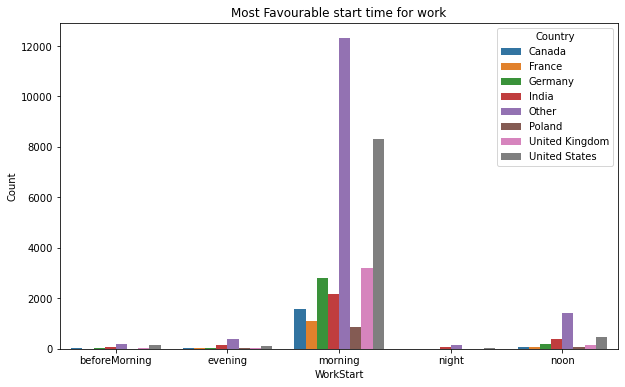

In [12]:
plt.figure(figsize=(10,6))
sns.barplot(x='WorkStart',y='Count',hue='Country',data=df3)
plt.title('Most Favourable start time for work')
plt.show()

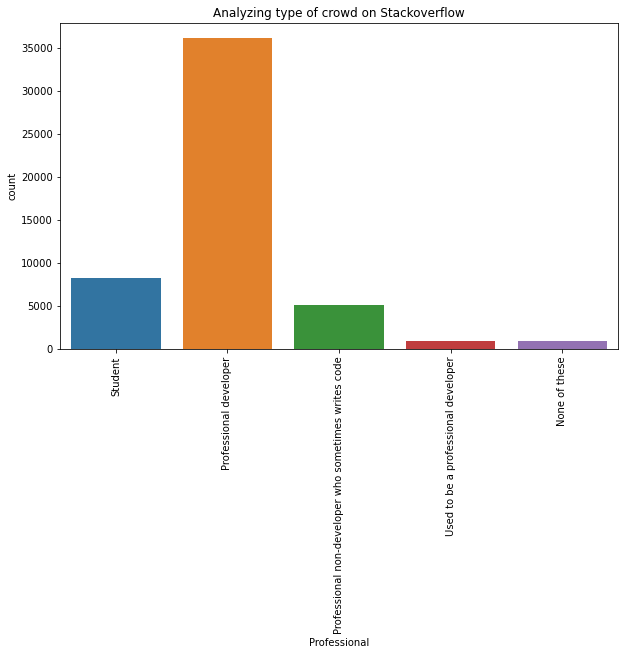

In [13]:
plt.figure(figsize=(10,6))
sns.countplot(df['Professional'])
plt.xticks(rotation=90)
plt.title('Analyzing type of crowd on Stackoverflow')
plt.show()

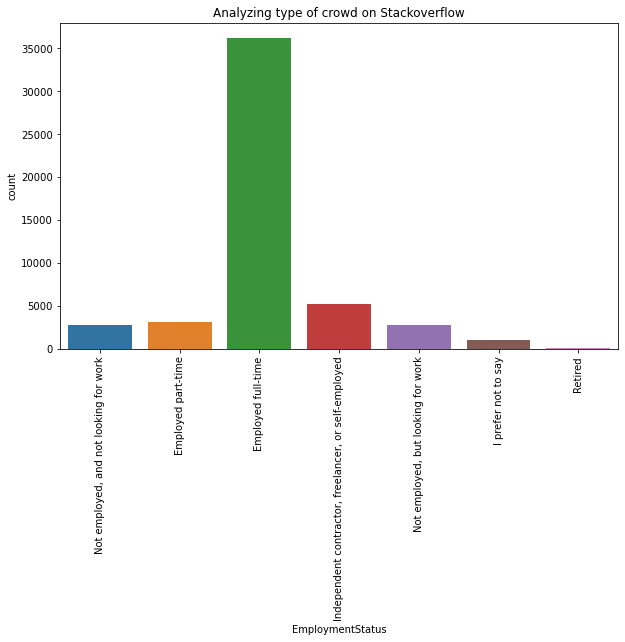

In [14]:
plt.figure(figsize=(10,6))
sns.countplot(df['EmploymentStatus'])
plt.xticks(rotation=90)
plt.title('Analyzing type of crowd on Stackoverflow')
plt.show()

In [15]:
df['ProgramHobby'].unique()

array(['Yes, both', 'Yes, I program as a hobby', 'No',
       'Yes, I contribute to open source projects'], dtype=object)

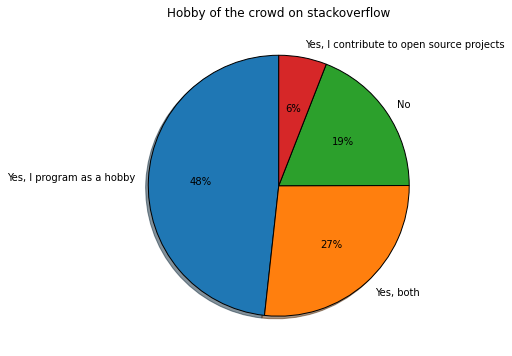

In [16]:
plt.figure(figsize=(10,6))
plt.pie(df['ProgramHobby'].value_counts(), labels = df['ProgramHobby'].value_counts().index,
        startangle=90, wedgeprops={'edgecolor': 'black'}, autopct='%1.f%%', shadow=True)
plt.title("Hobby of the crowd on stackoverflow")
plt.show()